# Leacock & Chodorow Similarity

$$
Sim_{lch} = -log\frac{length}{2*D}
$$

where $length$ is the length of the shortest path between two concepts using node-counting and $D$ is the maximum depth of the taxonomy.

For the rest of our analyses we will not be adding lexical matching since we know it can provide a minimal boost (around 2% improvement in our dataset).
I want to see what happens without this boost and look only at raw semantic similarity measurements.

#### REFERENCES
1. [Leacock et al. Using Corpus Statistics and WordNet Relations for Sense Identification](./papers/Leacock_1998-leacock_chodorow_algorithm.pdf)

In [1]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.text2text as tt
from importlib import reload
import spacy

## E1.1 v2.0_en [Nouns, Verbs, Adjectives]

1. Only looks at Nouns, Verbs, and Adjectives

In [46]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

2442


In [39]:
e11_res = tt.run_entailment_model(nlp_en, df2_en, 
                                  sim_fn=tt.leacock_chodorow_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 25.020%
Precision: 55.051%
Recall: 25.020%
F1-Measure: 29.751%
Pearson's R: 0.26
Cohen's Kappa: 0.08
RMSE: 1.84
MAE: 1.38
Y-True Mean: 4.15
Y-Pred Mean: 3.05
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.30


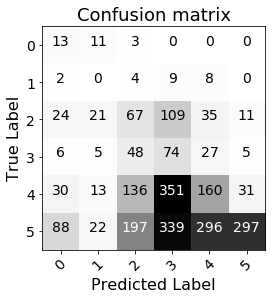

In [40]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.2 v2.0_en - Leacock and Chodorow [Nouns, Verbs, Adverbs, Adjectives]

1. Add in Adverbs.
2. Expectation: 
  - Overall lower scores since this approach requires student scores to match on more POS tags.
  - Perhaps higher precision since those answers which do match will perhaps be more likely to be true matches.

In [41]:
e12_res = tt.run_entailment_model(nlp_en, df2_en, 
                                  sim_fn=tt.leacock_chodorow_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADV', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 23.874%
Precision: 54.479%
Recall: 23.874%
F1-Measure: 28.371%
Pearson's R: 0.26
Cohen's Kappa: 0.08
RMSE: 1.87
MAE: 1.42
Y-True Mean: 4.15
Y-Pred Mean: 2.99
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.29


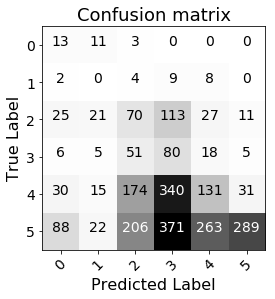

In [42]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))

## E1.3 v1.0_en - [LCH] [NN,VB,ADJ]

1. Let's try this method on a different dataset to see how it generalizes.

In [43]:
# Load Dataset
df1_en = utils.load_dataframe(language='en', version=1)
print(len(df1_en))


e13_res = tt.run_entailment_model(nlp_en, df1_en, 
                                  sim_fn=tt.leacock_chodorow_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADV'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 33.968%
Precision: 54.205%
Recall: 33.968%
F1-Measure: 37.285%
Pearson's R: 0.35
Cohen's Kappa: 0.15
RMSE: 1.51
MAE: 1.07
Y-True Mean: 4.03
Y-Pred Mean: 3.37
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.20


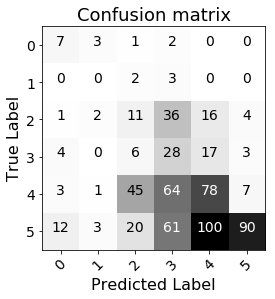

In [44]:
stats.print_big4(e13_res['y_true'], e13_res['y_pred'])
stats.print_stats(e13_res['y_true'], e13_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e13_res['y_true'], e13_res['y_pred']), classes=np.unique(e13_res['y_true']))

## E1.4 v2.0_es - [LCH] [NN,VB,ADJ]

1. Only Spanish is available on WordNet so we will run only Spanish WordNet tests and ignore German.

In [47]:
# Load Dataset
df2_es = utils.load_dataframe(language='es', version=2)
print(len(df2_es))

nlp_es = spacy.load('es')

e14_res = tt.run_entailment_model(nlp_es, df2_es, 
                                  sim_fn=tt.leacock_chodorow_similarity, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB','ADJ'])

2442
batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 11.466%
Precision: 53.232%
Recall: 11.466%
F1-Measure: 12.599%
Pearson's R: 0.18
Cohen's Kappa: 0.02
RMSE: 2.72
MAE: 2.31
Y-True Mean: 4.15
Y-Pred Mean: 1.92
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.32


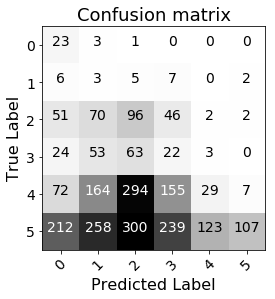

In [48]:
stats.print_big4(e14_res['y_true'], e14_res['y_pred'])
stats.print_stats(e14_res['y_true'], e14_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e14_res['y_true'], e14_res['y_pred']), classes=np.unique(e14_res['y_true']))

## EN1.5 v1.0_es - [LCH] [NN,VB,ADJ]

1. Only run for comparison purposes to the English v1.0.

In [49]:
# Load Dataset
df1_es = utils.load_dataframe(language='es', version=1)
print(len(df1_es))

nlp_en = spacy.load('es')

e15_res = tt.run_entailment_model(nlp_es, df1_es, 
                                  sim_fn=tt.leacock_chodorow_similarity, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB','ADJ'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 13.175%
Precision: 51.174%
Recall: 13.175%
F1-Measure: 10.902%
Pearson's R: 0.17
Cohen's Kappa: 0.03
RMSE: 2.55
MAE: 2.10
Y-True Mean: 4.03
Y-Pred Mean: 2.02
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.25


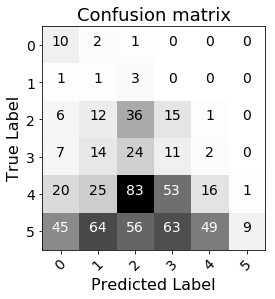

In [50]:
stats.print_big4(e15_res['y_true'], e15_res['y_pred'])
stats.print_stats(e15_res['y_true'], e15_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e15_res['y_true'], e15_res['y_pred']), classes=np.unique(e15_res['y_true']))